# Latent Dirichlet Allocation

In this final assignment, you will implement LDA and try it out on a corpus. Be sure to start work on this assignment early, because running your code will take some time. A full run of my implementation took about four hours. Consider running your code on smaller subcorpora during debugging.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Data loading

Try your Gibbs sampler on the corpus of 2000 movie reviews from Pang & Lee (2004), available on Classroom. The first line of the file specifies the number of documents. Then each subsequent line is one document, with the tokens separated by whitespace. I generated the file on Classroom from the original movie reviews by tokenizing them and then removing punctuation and stopwords, so you get nicer topics.

In [2]:
import os

source_data_filename = 'movies-pp.txt'
solution_filename = 'solution.py'

if not os.path.isfile(source_data_filename):
  ! wget https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/Computational_Linguistics/HW6_LDA/$source_data_filename

if not os.path.isfile(solution_filename):
  ! wget https://raw.githubusercontent.com/tsimafeip/LCT-master-course/main/Computational_Linguistics/HW6_LDA/$solution_filename

In [3]:
from solution import DataHelper
data_helper = DataHelper(source_data_filename)

print(data_helper.NUM_OF_DOCS, data_helper.VOCAB_SIZE, data_helper.CORPUS_SIZE)

2000 46517 698784


## Gibbs sampler

Implement a Gibbs sampler which resamples a topic for each word in the corpus according to the probability distribution in formula [5] of [Griffiths & Steyvers (2004)](https://www.pnas.org/content/101/suppl_1/5228). Initialize the topic assignments by choosing a topic uniformly at random for each token in the corpus. You can also refer to [Darling tutorial](https://u.cs.biu.ac.il/~89-680/darling-lda.pdf) for details of implementation.

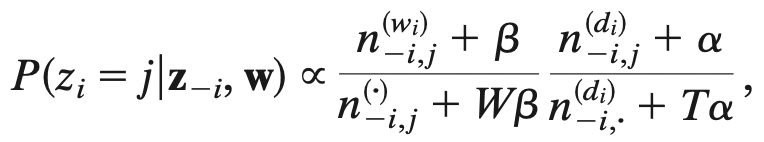

[34725, 34922, 34977, 34703, 34711, 34884, 34615, 34882, 34981, 35132, 35076, 34927, 34926, 34985, 35167, 34902, 34982, 35194, 35129, 34964]


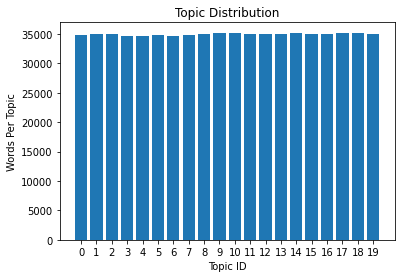

In [4]:
from solution import plot_topic_distribution

print(data_helper.topic_counter)
plot_topic_distribution(data_helper.topic_counter)

Algorithm
```
1) Run if for NUM_OF_ITERATIONS (hyperparam)
2) For each word in corpus (non-unique)
    get current topic
    decrease all respective counts:
       - general count of this topic;
       - count of this topic for specific word;
       - count of this topic in document;
    run loop over topics count K
      re-evaluate word_to_topic sampling probabilites
    choose new topic for the word based on weights obtained above
    increase all respective counts
```

Apply Gibbs sample to full corpus:

In [5]:
from solution import GibbsSampler

gibbs_sampler = GibbsSampler(data_helper)
trained_data_helper = gibbs_sampler.train()

path_to_trained_helper = trained_data_helper.export_trained_helper()

 24%|██▍       | 120/500 [40:15<2:07:28, 20.13s/it]

Try out different numbers of topics and iterations and different values for the hyperparameters. You should get good results with 20 topics, 500 iterations over the corpus, α = 0.02, and β = 0.1. Print, for each topic, the most frequent words for that topic in the final sample, and discuss to which extent the topics actually represent thematically coherent semantic fields.

In [ ]:
for topic_id in range(trained_data_helper.NUM_OF_TOPICS):
    print('Topic ID:', topic_id+1)
    print('Top-10 words:', trained_data_helper.get_most_popular_words_per_topic(topic_id))

Topic ID: 1
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'would', 'good', 'story', 'also', 'two']
Topic ID: 2
Top-10 words: ['film', 'one', 'movie', 'like', 'even', 'would', 'time', 'good', 'story', 'character']
Topic ID: 3
Top-10 words: ['film', 'one', 'movie', 'like', 'time', 'get', 'would', 'even', 'good', 'story']
Topic ID: 4
Top-10 words: ['film', 'one', 'movie', 'like', 'good', 'even', 'character', 'story', 'time', 'get']
Topic ID: 5
Top-10 words: ['film', 'movie', 'one', 'like', 'good', 'even', 'would', 'time', 'character', 'much']
Topic ID: 6
Top-10 words: ['film', 'movie', 'one', 'like', 'even', 'time', 'story', 'good', 'would', 'also']
Topic ID: 7
Top-10 words: ['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'would', 'get', 'character']
Topic ID: 8
Top-10 words: ['film', 'one', 'movie', 'like', 'even', 'character', 'would', 'good', 'time', 'get']
Topic ID: 9
Top-10 words: ['film', 'movie', 'one', 'like', 'time', 'even', 'good', 'character', 'see', 'much']
T

In [ ]:
imported_data_helper = DataHelper.import_trained_helper(path_to_trained_helper)
imported_data_helper.get_most_popular_words_per_topic(19)

['film',
 'movie',
 'one',
 'like',
 'even',
 'good',
 'time',
 'would',
 'story',
 'much']

## Extra credit

- Use Numpy to speed up the calculations;
- try your system on other corpora; 
- experiment with different strategies for initializing the topic assignments (e.g., give the same topic to all words of the same document);
- use a bit of supervised information (e.g., fix the topic assignments for specific words that you know should belong to that topic, and do not allow the sampler to change them).
